<a href="https://colab.research.google.com/github/eternaldemon/AI-Median-TIET/blob/master/ANN_Regression_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten
from matplotlib import pyplot as plt 
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
#!nvidia-smi

In [3]:
from google.colab import files
files.upload()

Saving Car_Purchasing_Data.csv to Car_Purchasing_Data.csv


{'Car_Purchasing_Data.csv': b'Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount\r\nMartina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.8517198,62812.09301,11609.38091,238961.2505,35321.45877\r\nHarlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.87062335,66646.89292,9572.957136,530973.9078,45115.52566\r\nNaomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradipiscing.co.uk,Algeria,1,43.15289747,53798.55112,11160.35506,638467.1773,42925.70921\r\nJade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.27136945,79370.03798,14426.16485,548599.0524,67422.36313\r\nCedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.31374945,59729.1513,5358.712177,560304.0671,55915.46248\r\nCarla Hester,mi@Aliquamerat.edu,Liberia,1,56.82489312,68499.85162,14179.47244,428485.3604,56611.99784\r\nGriffin Rivera,vehicula@at.co.uk,Syria,1,46.60731485,39814.522,5958.460188,326373.1812,28925.70549\r\nOrli Casey

In [4]:
data = pd.read_csv('Car_Purchasing_Data.csv',encoding='latin1',index_col=None)

In [5]:
data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [6]:
x = pd.DataFrame(data.iloc[:,:-1])
y = pd.DataFrame(data.iloc[:,-1])

In [7]:
print(x.shape)
print(y.shape)

(500, 8)
(500, 1)


In [8]:
data_object = pd.DataFrame(x.select_dtypes(include=['object']))
data_left = pd.DataFrame(x.select_dtypes(exclude=['object']))

In [9]:
data_object.head()

,Customer Name,Customer e-mail,Country
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil


In [10]:
data_left.isna().sum().sort_values(ascending=False).head() 
# No null values , good

Net Worth           0
Credit Card Debt    0
Annual Salary       0
Age                 0
Gender              0
dtype: int64

In [11]:
data_object.columns=['col1','col2','col3']

In [12]:
for col in data_object.columns:
  print(len(data_object[col].unique()), 'For column :',col)

498 For column : col1
500 For column : col2
211 For column : col3


In [13]:
top10 = [x for x in data_object.col1.value_counts().sort_values(ascending=False).head(20).index]
top10

['Seth',
 'Walter',
 'Kyle',
 'Penelope',
 'Dominic I. Faulkner',
 'Zenia H. Patel',
 'Benedict Serrano',
 'Hardy, Hilary R.',
 'Shad K. Hancock',
 'Peter Maynard',
 'Jared Green',
 'Benjamin',
 'Chambers, Avram C.',
 'Pearl',
 'Hudson, Maxwell F.',
 'Ariana Nash',
 'Kaitlin',
 'Decker, Jolie T.',
 'Holmes Lane',
 'Clementine X. Powell']

In [14]:
label = LabelEncoder()
data_object.loc[:,:] = data_object.loc[:,:].apply(label.fit_transform)

In [15]:
def onehotmax(data, column):

  column = str(column)

  top10 = [x for x in data[column].value_counts().sort_values(ascending=False).head(10).index]

  for label in top10:
    data[column+'_'+str(label)]=np.where(data[column]==label,1,0)

  print('Encoding for column : ', column)


In [16]:
onehotmax(data_object,'col1')
onehotmax(data_object,'col2')
onehotmax(data_object,'col3')

Encoding for column :  col1
Encoding for column :  col2
Encoding for column :  col3


In [17]:
data_object.head()

,col1,col2,col3,col1_411,col1_475,col1_11,col1_29,col1_60,col1_28,col1_1,col1_2,col1_3,col1_4,col2_0,col2_11,col2_30,col2_29,col2_28,col2_1,col2_2,col2_3,col2_4,col2_5,col3_85,col3_21,col3_114,col3_66,col3_20,col3_8,col3_1,col3_96,col3_158,col3_52
0,288,139,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,168,224,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,311,498,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,204,307,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,70,241,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
data_object.shape
data_left.shape

(500, 5)

In [19]:
frames = ['col1','col2','col3']
data_object = data_object.drop(frames, axis =1)

In [20]:
data_object = pd.DataFrame(data_object)
data_left = pd.DataFrame(data_left)

In [21]:
frames = [data_object, data_left]
data_encoded = pd.concat(frames,axis=1)

In [22]:
xx = pd.DataFrame(data_encoded)
yy = pd.DataFrame(y)

In [23]:
yy.head()

,Car Purchase Amount
0,35321.45877
1,45115.52566
2,42925.70921
3,67422.36313
4,55915.46248


In [24]:
xx.shape


(500, 35)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [26]:
x_train,x_test,y_train,y_test = train_test_split(xx,yy,test_size=0.2,random_state=7)

In [27]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [30]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [31]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,-0.070888,-0.070888,-0.050063,0.0,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,0.0,-0.050063,-0.050063,-0.050063,-0.050063,-0.086929,-0.123404,-0.112509,-0.100504,-0.086929,-0.100504,-0.086929,-0.112509,-0.070888,-0.100504,-0.990050,-0.734138,2.693319,-1.176142,0.484393
1,-0.070888,-0.070888,-0.050063,0.0,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,0.0,-0.050063,-0.050063,-0.050063,-0.050063,-0.086929,-0.123404,-0.112509,-0.100504,-0.086929,-0.100504,-0.086929,-0.112509,-0.070888,-0.100504,1.010051,-1.252489,0.778434,-0.040137,-0.379155
2,-0.070888,-0.070888,-0.050063,0.0,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,0.0,-0.050063,-0.050063,-0.050063,-0.050063,-0.086929,-0.123404,-0.112509,-0.100504,-0.086929,-0.100504,-0.086929,-0.112509,-0.070888,-0.100504,1.010051,-0.592439,0.719314,-0.146730,2.003619
3,-0.070888,-0.070888,-0.050063,0.0,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,0.0,-0.050063,-0.050063,-0.050063,-0.050063,-0.086929,-0.123404,-0.112509,-0.100504,-0.086929,-0.100504,-0.086929,-0.112509,-0.070888,-0.100504,1.010051,-0.681242,-2.044839,0.427700,0.115184
4,-0.070888,-0.070888,-0.050063,0.0,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,-0.050063,0.0,-0.050063,-0.050063,-0.050063,-0.050063,-0.086929,-0.123404,-0.112509,-0.100504,-0.086929,-0.100504,-0.086929,-0.112509,-0.070888,-0.100504,-0.990050,0.128679,-0.304869,-1.389084,0.437310


In [36]:
# ANN

i = Input(shape=(xx.shape[1],))
a = Dense(256, activation='relu', kernel_initializer='normal')(i)
a = Dropout(0.2)(a)
a = Dense(512, activation='relu')(a)
a = Dense(256, activation='relu',kernel_initializer='normal')(a)
a = Dropout(0.1)(a)
a = Dense(32, activation='relu')(a)
a = Dense(1)(a)

model = Model(i,a)

In [37]:
model.summary()
model.output_shape

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 35)]              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               9216      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                8224

(None, 1)

In [34]:
opt = tf.keras.optimizers.Adam(0.01)

In [38]:
model.compile(optimizer='rmsprop',loss='mse',metrics=['mse','mae'])


history = model.fit(x_train,y_train,epochs=10000,verbose=1)

Streaming output truncated to the last 5000 lines.
13/13 [==============================] - 0s 6ms/step - loss: 1496154.5000 - mse: 1496154.5000 - mae: 896.3217
Epoch 7502/10000
13/13 [==============================] - 0s 5ms/step - loss: 1108582.7500 - mse: 1108582.7500 - mae: 755.3297
Epoch 7503/10000
13/13 [==============================] - 0s 5ms/step - loss: 1372491.6250 - mse: 1372491.6250 - mae: 821.5278
Epoch 7504/10000
13/13 [==============================] - 0s 5ms/step - loss: 1081201.3750 - mse: 1081201.3750 - mae: 750.9606
Epoch 7505/10000
13/13 [==============================] - 0s 5ms/step - loss: 1408794.8750 - mse: 1408794.8750 - mae: 890.0756
Epoch 7506/10000
13/13 [==============================] - 0s 6ms/step - loss: 989607.2500 - mse: 989607.2500 - mae: 735.9133
Epoch 7507/10000
13/13 [==============================] - 0s 5ms/step - loss: 1387850.1250 - mse: 1387850.1250 - mae: 847.9699
Epoch 7508/10000
13/13 [==============================] - 0s 5ms/step - loss: 1

In [42]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 29572726.0000 - mse: 29572726.0000 - mae: 5157.3242


[29572726.0, 29572726.0, 5157.32421875]

In [45]:
model.evaluate(x_train,y_train)

13/13 [==============================] - 0s 2ms/step - loss: 29933022.0000 - mse: 29933022.0000 - mae: 5236.0747


[29933022.0, 29933022.0, 5236.07470703125]

In [43]:
predictions = pd.DataFrame(model.predict(x_test).flatten())

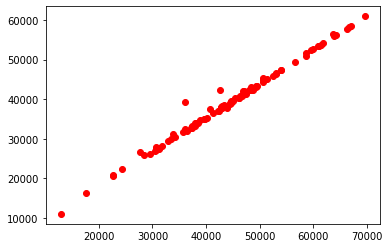

In [49]:
plt.plot(y_test, predictions,'ro')
plt.show()

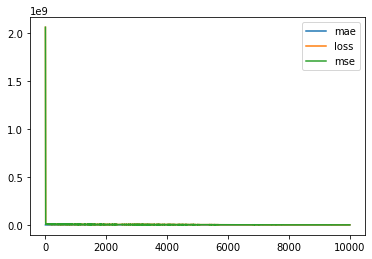

In [44]:
plt.plot(history.history['mae'], label = 'mae')
plt.plot(history.history['loss'], label='loss' )
plt.plot(history.history['mse'], label='mse')
plt.legend()
plt.show()